In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("cashback_cleaned.csv")

In [4]:
pd.set_option('display.max_columns', None) # чтобы видеть все столбцы при выводе таблицы

In [5]:
df.loc[:, ['act_pharmacy', 'act_restaurants',
       'act_clothes', 'act_car_service', 'act_supermarkets', 'act_taxi',
       'act_beauty', 'act_entertainment', 'act_railway', 'act_education',
       'act_house', 'act_sports_goods', 'act_pets', 'act_flowers',
       'act_fastfood', 'act_carsharing', 'act_rent_car']].sum(axis=1)

0        3
1        3
2        3
3        3
4        2
        ..
54997    0
54998    3
54999    2
55000    2
55001    2
Length: 55002, dtype: int64

In [6]:
df

,client_id,region,city,age,sex,month,total,total_cashback,pharmacy,restaurants,clothes,car_service,supermarkets,taxi,beauty,entertainment,railway,education,house,sports_goods,pets,flowers,fastfood,carsharing,rent_car,act_pharmacy,act_restaurants,act_clothes,act_car_service,act_supermarkets,act_taxi,act_beauty,act_entertainment,act_railway,act_education,act_house,act_sports_goods,act_pets,act_flowers,act_fastfood,act_carsharing,act_rent_car,back_pharmacy,back_restaurants,back_clothes,back_car_service,back_supermarkets,back_taxi,back_beauty,back_entertainment,back_railway,back_education,back_house,back_sports_goods,back_pets,back_flowers,back_fastfood,back_carsharing,back_rent_car
0,1889,Москва,Москва,50,M,2023-04-01,769455,21186,18993,99900,3294,0,397450,86037,96570,27420,0,0,9112,2100,0,660,27919,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,864,486,0,0,19836,0,0,0,0,0,0,0,0,0,0,0,0
1,1889,Москва,Москва,50,M,2023-05-01,817209,16161,37807,92424,0,6750,219394,109221,80520,76950,0,0,63936,5550,37147,0,87510,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1884,0,0,0,10614,0,3663,0,0,0,0,0,0,0,0,0,0
2,1889,Москва,Москва,50,M,2023-06-01,1059606,24009,20791,124800,51246,67490,479201,100395,66165,113100,0,0,16413,4215,8122,0,7668,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,21,2025,0,0,21963,0,0,0,0,0,0,0,0,0,0,0,0
3,1889,Москва,Москва,50,M,2023-07-01,1158324,28086,131129,18060,78120,2400,532117,63909,59280,0,0,0,240492,0,18297,0,14520,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6033,0,0,0,22053,0,0,0,0,0,0,0,0,0,0,0,0
4,1889,Москва,Москва,50,M,2023-08-01,1104241,22584,44096,198480,19080,147705,286070,69279,178920,0,0,0,58884,13200,0,0,88527,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13491,0,9093,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54997,1005319581,Москва,Москва,37,NaN,2023-05-01,174758,0,657,54375,0,0,42113,46719,0,6000,0,0,0,0,0,0,24894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54998,1005319581,Москва,Москва,37,NaN,2023-06-01,273375,5634,0,128070,0,0,37164,86751,1800,5400,0,0,0,0,0,0,14190,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,5364,0,0,0,0,0,270,0,0,0,0,0,0,0,0,0
54999,1005319581,Москва,Москва,37,NaN,2023-07-01,168676,2907,5919,26085,0,0,32419,31272,0,27300,2700,0,2997,0,0,0,39984,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1542,0,1365,0,0,0,0,0,0,0,0,0
55000,1005319581,Москва,Москва,37,NaN,2023-08-01,205576,2427,1705,111690,0,0,16539,47529,1950,2778,0,0,0,0,0,0,23385,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,2343,0,0,0,0,0,0,0,0,0,0,0


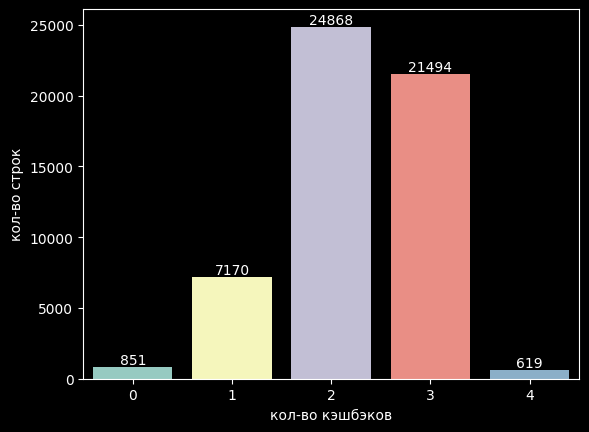

In [7]:
num_of_activations = df.loc[:, 'act_pharmacy':'act_rent_car']
sum_of_act = num_of_activations.sum(axis=1)
labels = [0, 1, 2, 3, 4]
data = []
for i in range(5):
    data.append(sum_of_act.loc[sum_of_act == i].count())
    
plt.style.use("dark_background")
plt.tight_layout()

ser = pd.Series(data, index=labels)
ser = ser.to_frame()

barSet = sns.barplot(x=ser.index, y=ser[0], data=ser, errorbar=None)
barSet.set(xlabel='кол-во кэшбэков', ylabel='кол-во строк')
barSet.bar_label(barSet.containers[0])
plt.savefig("кэшбэк.svg")
plt.show()

In [8]:
category_list = ['pharmacy', 'restaurants',
       'clothes', 'car_service', 'supermarkets', 'taxi',
       'beauty', 'entertainment', 'railway', 'education',
       'house', 'sports_goods', 'pets', 'flowers',
       'fastfood', 'carsharing', 'rent_car']

In [9]:
category_dfs = []

In [10]:
for category in category_list:
    category_dfs.append(df.loc[:, [total, category, 'act_' + category]]) # вероятно, что нам не понадобится добавлять величину кэшбэка

NameError: name 'total' is not defined

In [11]:
df.isnull().sum()

client_id              0
region                 0
city                   0
age                    0
sex                   96
month                  0
total                  0
total_cashback         0
pharmacy               0
restaurants            0
clothes                0
car_service            0
supermarkets           0
taxi                   0
beauty                 0
entertainment          0
railway                0
education              0
house                  0
sports_goods           0
pets                   0
flowers                0
fastfood               0
carsharing             0
rent_car               0
act_pharmacy           0
act_restaurants        0
act_clothes            0
act_car_service        0
act_supermarkets       0
act_taxi               0
act_beauty             0
act_entertainment      0
act_railway            0
act_education          0
act_house              0
act_sports_goods       0
act_pets               0
act_flowers            0
act_fastfood           0


Узнать то, насколько менялся выбор кэшбэка от месяца к месяцу

In [12]:
df1 = df.groupby('client_id')[['act_pharmacy', 'act_restaurants',
       'act_clothes', 'act_car_service', 'act_supermarkets', 'act_taxi',
       'act_beauty', 'act_entertainment', 'act_railway', 'act_education',
       'act_house', 'act_sports_goods', 'act_pets', 'act_flowers',
       'act_fastfood', 'act_carsharing', 'act_rent_car']].sum()

In [13]:
df1

,act_pharmacy,act_restaurants,act_clothes,act_car_service,act_supermarkets,act_taxi,act_beauty,act_entertainment,act_railway,act_education,act_house,act_sports_goods,act_pets,act_flowers,act_fastfood,act_carsharing,act_rent_car
client_id,,,,,,,,,,,,,,,,,
1889,4,3,0,0,6,0,3,0,0,0,1,0,0,0,0,0,0
2213,2,1,2,0,4,0,0,1,1,2,0,0,1,0,0,0,0
191765,1,1,3,2,1,0,1,0,1,0,0,0,4,0,0,0,0
256820,5,0,2,2,1,0,5,1,0,0,0,0,0,2,0,0,0
282534,3,3,3,0,0,0,5,0,0,0,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002982745,4,0,2,0,0,0,1,0,0,0,0,0,0,2,0,0,0
1002997975,4,0,1,0,0,1,0,4,2,0,0,0,0,0,0,0,0
1003172384,3,2,1,1,0,0,0,2,0,0,0,0,1,0,0,0,0


In [14]:
actCols = df1.columns
data = []
data1 = []

In [15]:
actCols

Index(['act_pharmacy', 'act_restaurants', 'act_clothes', 'act_car_service',
       'act_supermarkets', 'act_taxi', 'act_beauty', 'act_entertainment',
       'act_railway', 'act_education', 'act_house', 'act_sports_goods',
       'act_pets', 'act_flowers', 'act_fastfood', 'act_carsharing',
       'act_rent_car'],
      dtype='object')

In [16]:
for i in range(17):
  data.append(df1.iloc[:, i].loc[(2 <= df1.iloc[:, i]) & (df1.iloc[:, i] <= 4)].count())
  data1.append(df1.iloc[:, i].loc[(2 <= df1.iloc[:, i]) & (df1.iloc[:, i] <= 4)].index)
data1

[Int64Index([      1889,       2213,     282534,     283148,     331214,
                 405465,     861276,     935564,    1015614,    1041833,
             ...
             1002531915, 1002546432, 1002596705, 1002607234, 1002620484,
             1002982745, 1002997975, 1003172384, 1003493065, 1005319581],
            dtype='int64', name='client_id', length=4589),
 Int64Index([      1889,     282534,     283148,     286878,     582257,
                 941567,     969180,     983133,    1015614,    1041833,
             ...
              998432560,  999894498,  999916737,  999927292, 1000436510,
             1002527558, 1002596705, 1002620484, 1003172384, 1005319581],
            dtype='int64', name='client_id', length=3954),
 Int64Index([      2213,     191765,     256820,     282534,     283148,
                 286878,     378992,     582257,     861276,    1015614,
             ...
              999210143,  999927292, 1000325361, 1000364011, 1000436510,
             1000552110, 1

In [17]:
actSer = pd.Series(data, index=actCols)
actSer.sort_values(ascending=False, inplace=True)

In [18]:
actSer = actSer.to_frame()

In [19]:
actSer

,0
act_pharmacy,4589
act_restaurants,3954
act_clothes,3734
act_entertainment,3465
act_beauty,2886
act_car_service,1767
act_railway,1434
act_supermarkets,1434
act_taxi,1415
act_sports_goods,1261


In [20]:
plt.style.use("dark_background")
cols = ['gold'] * 13 + ['white'] * 4

In [21]:
rc = {'figure.figsize':(12,8),
      'axes.grid' : True,
      'font.size' : 15}
plt.rcParams.update(rc)
plt.tight_layout()

<Figure size 1200x800 with 0 Axes>

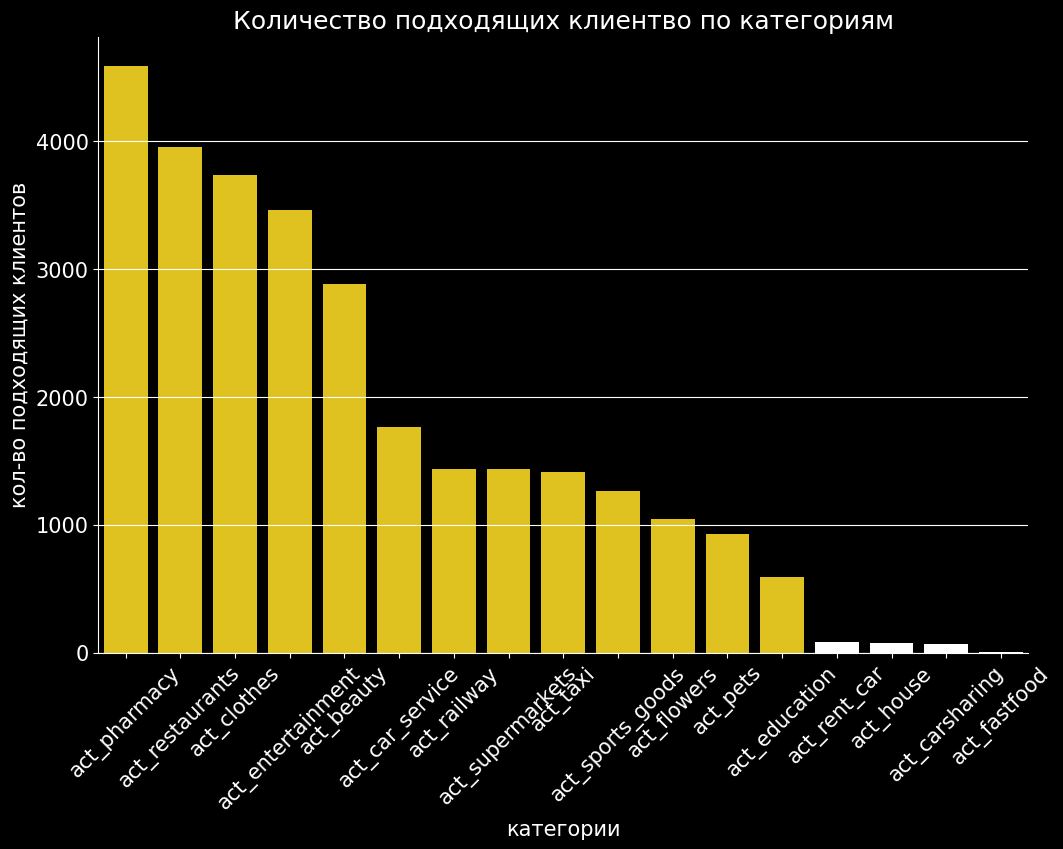

In [22]:
bars = sns.barplot(x=actSer.index, y=actSer[0], data=actSer, errorbar=None, palette=cols)
bars.set(xlabel='категории', ylabel='кол-во подходящих клиентов', title='Количество подходящих клиентво по категориям')
bars.tick_params(axis='x', rotation=45)
sns.despine()
plt.savefig("correct clients.svg")
plt.show()

In [23]:
data1

[Int64Index([      1889,       2213,     282534,     283148,     331214,
                 405465,     861276,     935564,    1015614,    1041833,
             ...
             1002531915, 1002546432, 1002596705, 1002607234, 1002620484,
             1002982745, 1002997975, 1003172384, 1003493065, 1005319581],
            dtype='int64', name='client_id', length=4589),
 Int64Index([      1889,     282534,     283148,     286878,     582257,
                 941567,     969180,     983133,    1015614,    1041833,
             ...
              998432560,  999894498,  999916737,  999927292, 1000436510,
             1002527558, 1002596705, 1002620484, 1003172384, 1005319581],
            dtype='int64', name='client_id', length=3954),
 Int64Index([      2213,     191765,     256820,     282534,     283148,
                 286878,     378992,     582257,     861276,    1015614,
             ...
              999210143,  999927292, 1000325361, 1000364011, 1000436510,
             1000552110, 1

In [24]:
actCols = df1.columns
actCols

Index(['act_pharmacy', 'act_restaurants', 'act_clothes', 'act_car_service',
       'act_supermarkets', 'act_taxi', 'act_beauty', 'act_entertainment',
       'act_railway', 'act_education', 'act_house', 'act_sports_goods',
       'act_pets', 'act_flowers', 'act_fastfood', 'act_carsharing',
       'act_rent_car'],
      dtype='object')

In [25]:
payment = ['pharmacy', 'restaurants', 'clothes', 'car_service',
       'supermarkets', 'taxi', 'beauty', 'entertainment', 'railway',
       'education', 'house', 'sports_goods', 'pets', 'flowers', 'fastfood',
       'carsharing', 'rent_car']

In [141]:
mechanism = pd.DataFrame()
for i in range(17):
    if (len(data1[i]) >= 500):
        mechList = []
        category = df.loc[df['client_id'].isin(data1[i])]
        for j in range(0, len(category), 6):
            client = category.iloc[j:j + 6]
            active = client.loc[client[actCols[i]] == 1]
            notActive = client.loc[client[actCols[i]] == 0]
            active = active.loc[active['total'] > 0]
            notActive = notActive.loc[notActive['total'] > 0]
            activeCoeff = (active[payment[i]] / active['total']).mean()
            notActiveCoeff = (notActive[payment[i]] / notActive['total']).mean()
            if notActiveCoeff != 0:
                coeff = activeCoeff / notActiveCoeff * 100 - 100
                mechList.append(coeff)
        mechDF = pd.DataFrame(data={payment[i]: mechList})
        mechanism = pd.concat([mechanism, mechDF], axis=1)
mechanism

,pharmacy,restaurants,clothes,car_service,supermarkets,taxi,beauty,entertainment,railway,education,sports_goods,pets,flowers
0,2.645371,-41.443176,345.268162,428.266196,-68.055306,-48.371596,34.317792,-88.136628,3454.533407,4303.267954,-100.000000,-40.198242,-36.791053
1,-100.000000,174.128302,-86.015250,601.872076,59.263693,-13.174305,-54.557806,44502.398321,-100.000000,2049.507782,204.647170,110.523341,3351.002049
2,227.135342,1253.705983,112.207124,931.611819,6.706006,21.284407,1909.144269,-71.528056,39.280571,-100.000000,309.274304,85.309454,55.308080
3,-40.911359,2566.976787,-26.643097,198.304467,17.710557,-13.759909,97.322083,305.803160,17.234622,107.309502,-79.371955,110.930999,1270.198535
4,-32.165965,-9.916264,2040.547568,15.744343,160.105291,72.569231,251.524602,-29.415532,94.840578,3500.966215,386.948284,3.317849,76.985678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,-9.319210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4382,-69.885386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4383,-23.186802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4384,170.309051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
pharmMech = mechanism['pharmacy']

In [147]:
car_serviceMech = mechanism['car_service']
pharmMech1 = pharmMech[pharmMech <= 900]
len(pharmMech1) / len(pharmMech)

0.9293205654354765

<AxesSubplot:ylabel='pharmacy'>

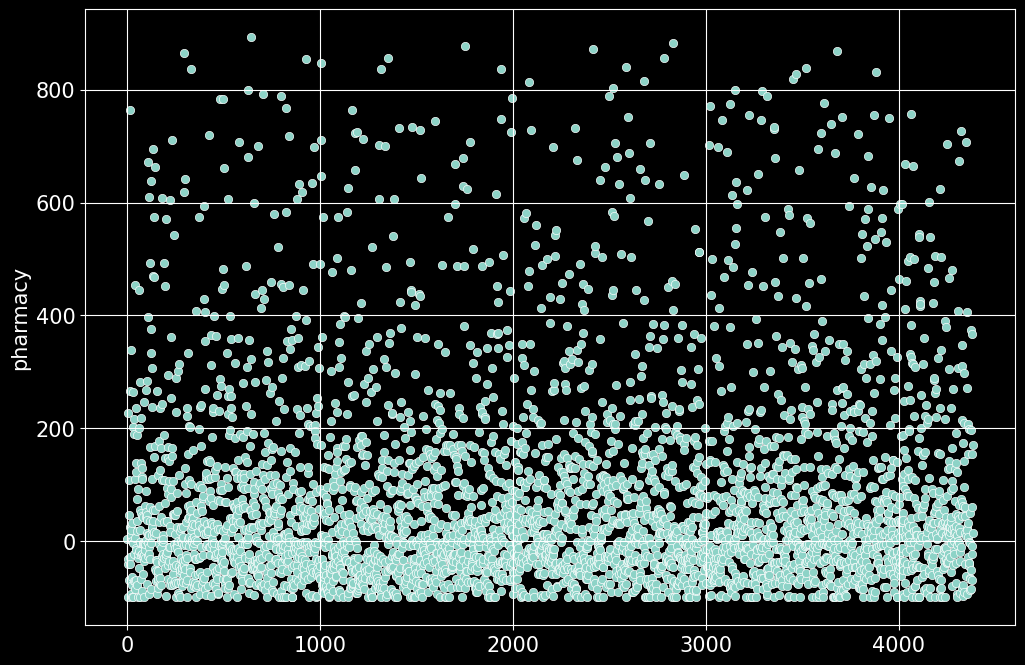

In [148]:
sns.scatterplot(data=pharmMech1)

0.269265845873233


<AxesSubplot:ylabel='car_service'>

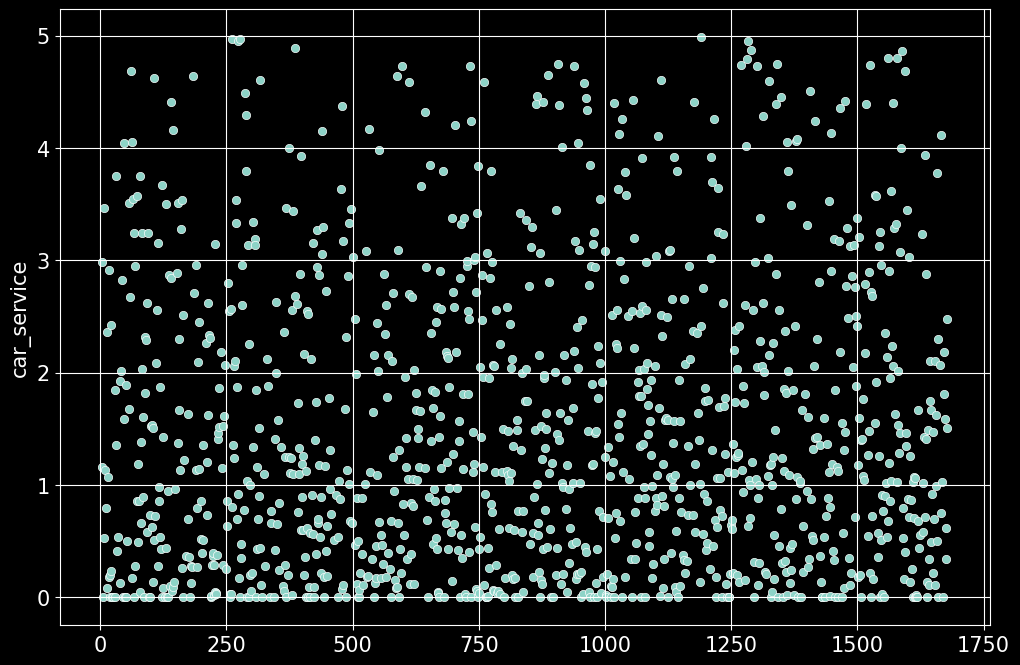

In [133]:
car_serviceMech1 = car_serviceMech[car_serviceMech <= 5]
print(len(car_serviceMech1) / len(car_serviceMech))
sns.scatterplot(data=car_serviceMech1)

In [88]:
pharmMech1 = pharmMech[pharmMech <= 3]
pharmMech1

0       1.026454
1       0.000000
3       0.590886
4       0.678340
6       2.083075
          ...   
4381    0.906808
4382    0.301146
4383    0.768132
4384    2.703091
4385    1.144122
Name: pharmacy, Length: 3369, dtype: float64

<AxesSubplot:ylabel='pharmacy'>

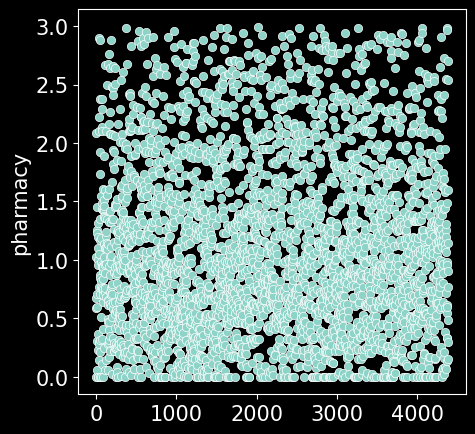

In [87]:
sns.scatterplot(data=pharmMech1)

In [74]:
rc = {'figure.figsize':(5,5),
      'font.size' : 15}
plt.rcParams.update(rc)

<AxesSubplot:>

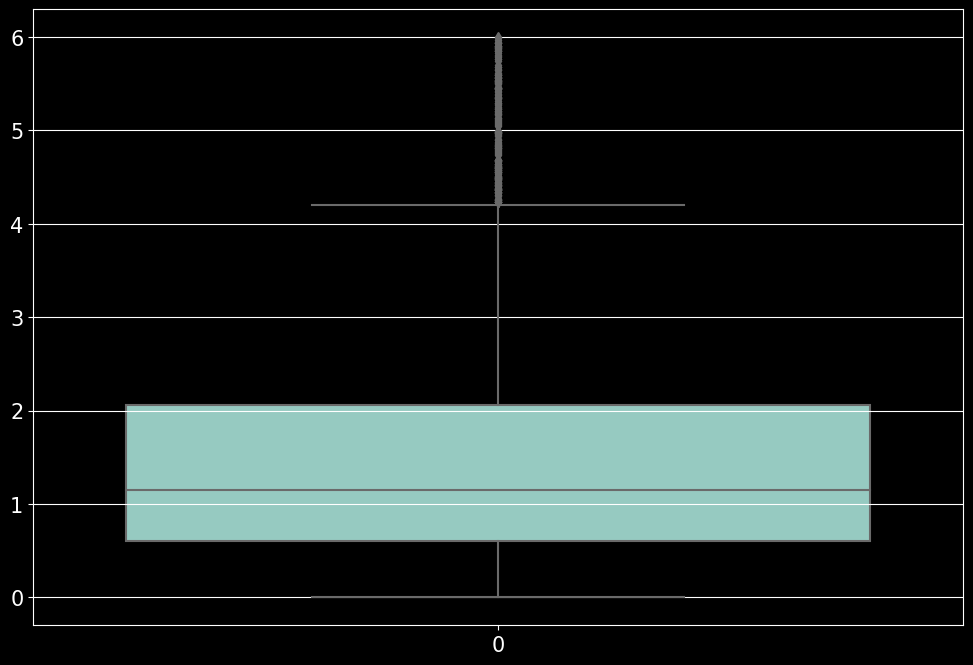

In [134]:
sns.boxplot(pharmMech1)

In [91]:
mechanism

,pharmacy,restaurants,clothes,car_service,supermarkets,taxi,beauty,entertainment,railway,education,sports_goods,pets,flowers
0,1.026454,0.585568,4.452682,5.282662,0.319447,0.516284,1.343178,0.118634,35.545334,44.032680,0.000000,0.598018,0.632089
1,0.000000,2.741283,0.139848,7.018721,1.592637,0.868257,0.454422,446.023983,0.000000,21.495078,3.046472,2.105233,34.510020
2,3.271353,13.537060,2.122071,10.316118,1.067060,1.212844,20.091443,0.284719,1.392806,0.000000,4.092743,1.853095,1.553081
3,0.590886,26.669768,0.733569,2.983045,1.177106,0.862401,1.973221,4.058032,1.172346,2.073095,0.206280,2.109310,13.701985
4,0.678340,0.900837,21.405476,1.157443,2.601053,1.725692,3.515246,0.705845,1.948406,36.009662,4.869483,1.033178,1.769857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,0.906808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4382,0.301146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4383,0.768132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4384,2.703091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
mechanism.median().to_frame()

,0
pharmacy,1.310578
restaurants,1.167918
clothes,1.244702
car_service,2.087499
supermarkets,1.083390
taxi,1.121422
beauty,1.114717
entertainment,1.249272
railway,1.814174
education,1.865838


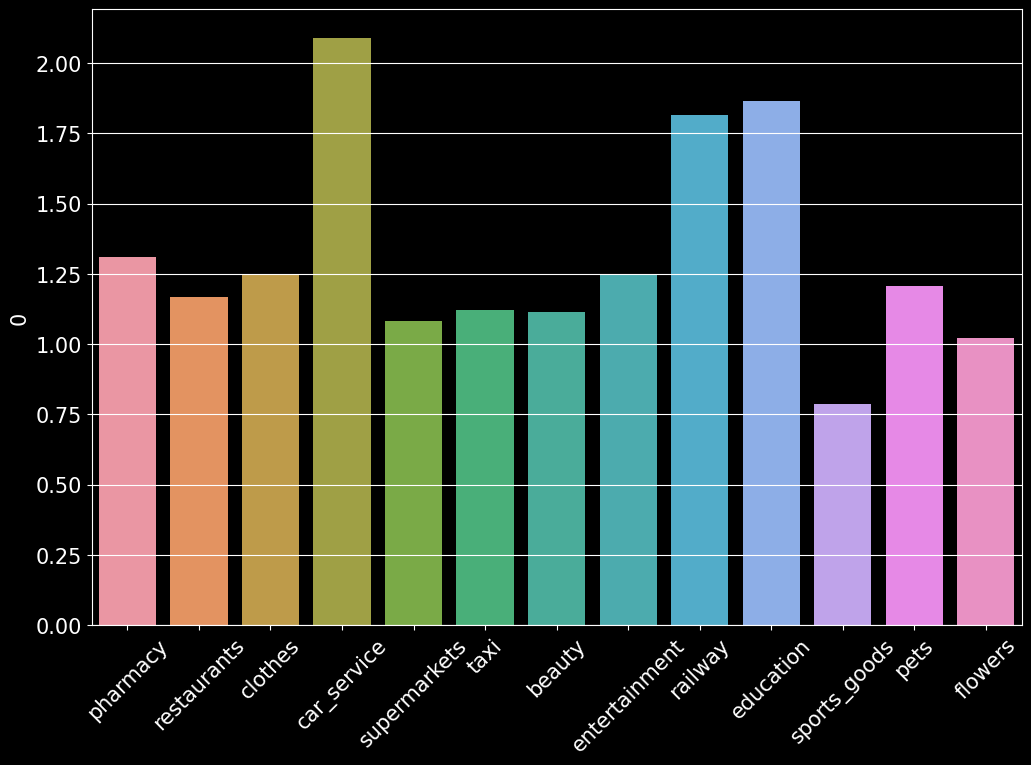

In [105]:
rc = {'figure.figsize':(12,8),
      'axes.grid' : True,
      'font.size' : 15}
plt.rcParams.update(rc)
plt.tight_layout()
mechBars = sns.barplot(x=mechanism.median().to_frame().index, y=mechanism.median().to_frame()[0], data=mechanism.median().to_frame(), errorbar=None)
mechBars.tick_params(axis='x', rotation=45)
plt.show()

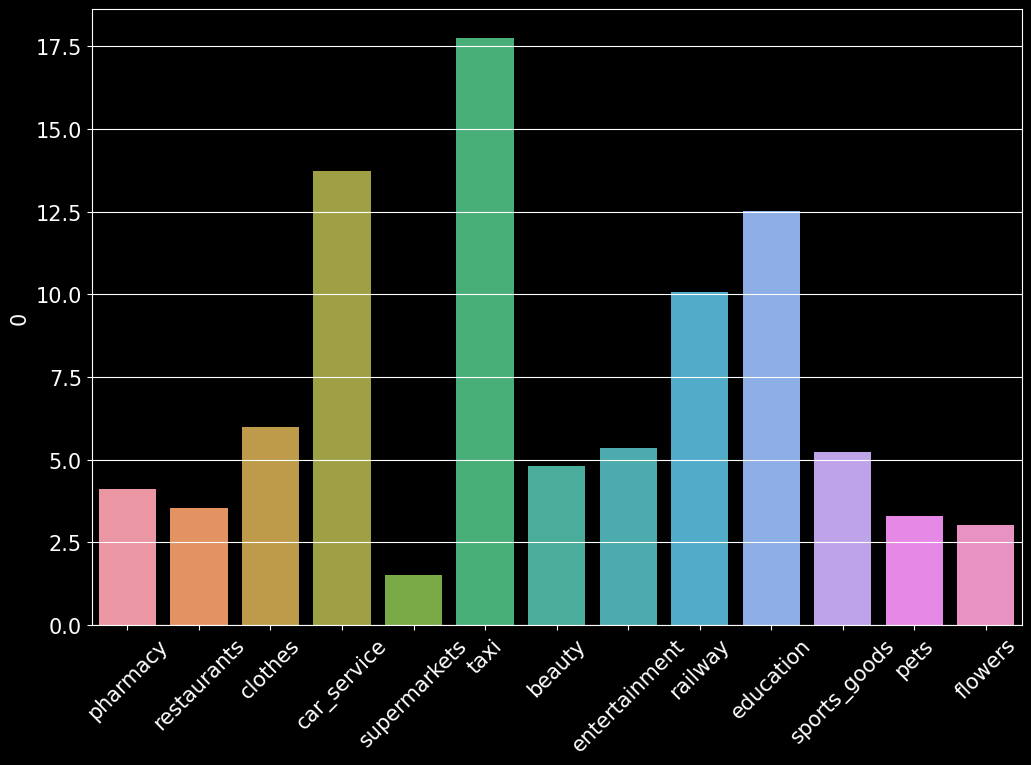

In [135]:
rc = {'figure.figsize':(12,8),
      'axes.grid' : True,
      'font.size' : 15}
plt.rcParams.update(rc)
plt.tight_layout()
mechBars = sns.barplot(x=mechanism.mean().to_frame().index, y=mechanism.mean().to_frame()[0], data=mechanism.mean().to_frame(), errorbar=None)
mechBars.tick_params(axis='x', rotation=45)
plt.show()